## Q5.
**Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers.<br>
Divide the data set into training and test set. Compare the accuracy of the different classifiers
under the following situations:<br>
5.1**
<br>**a) Training set = 75% Test set = 25%<br> b) Training set = 66.6% (2/3rd of total), Test set =
33.3%<br>
5.2**
<br>**Training set is chosen by<br> i) hold out method <br>ii) Random subsampling <br>iii) Cross-Validation.
Compare the accuracy of the classifiers obtained.<br>
5.3**<br>
<br>**Data is scaled to standard format.<br>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Rice_Cammeo_Osmancik.xlsx")

In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [5]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [6]:
df["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

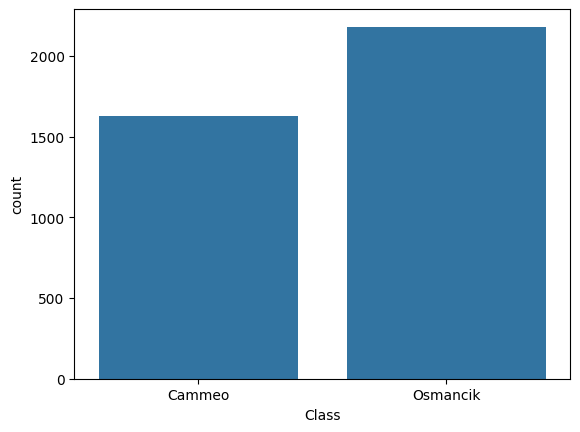

In [7]:
sns.countplot(x="Class", data=df)

In [8]:
encoder = LabelEncoder()

df["Class"] = encoder.fit_transform(df['Class'])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0


## 5.1 - Holdout Method

In [9]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Değişkenleri eğitim ve test verisi olarak ayırıyorum.
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X,y,test_size = 0.25, random_state = 42)
X_train_66, X_test_33, y_train_66, y_test_33 = train_test_split(X,y,test_size = 0.33, random_state = 42)

   KNN Accuracy: 0.89
   Naive Bayes Accuracy: 0.92
   Decision Tree Accuracy: 0.88


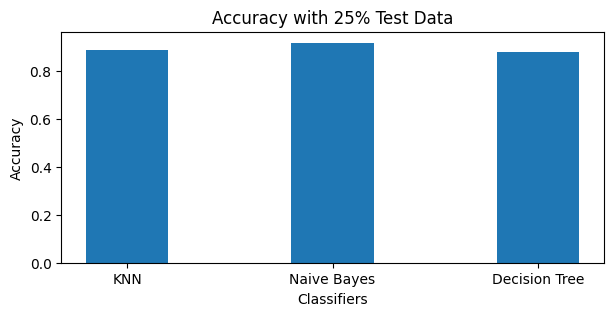

In [10]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

acc=[]
for name, clf in classifiers.items():
    clf.fit(X_train_75, y_train_75)

    # Evaluate the classifier
    y_pred = clf.predict(X_test_25)
    accuracy = accuracy_score(y_test_25, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")
    acc.append(accuracy)
fig = plt.figure(figsize = (7, 3))
 # creating the bar plot
plt.bar(["KNN","Naive Bayes","Decision Tree"], acc, 
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy with 25% Test Data")
plt.show()

   KNN Accuracy: 0.88
   Naive Bayes Accuracy: 0.91
   Decision Tree Accuracy: 0.88


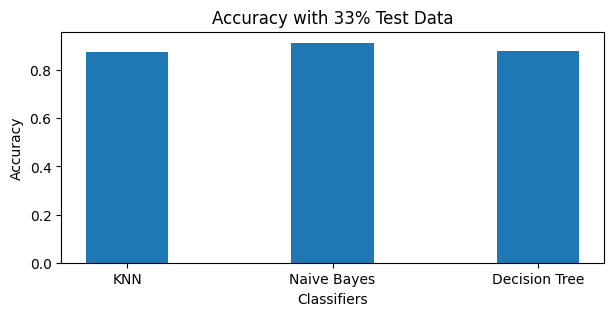

In [11]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

acc=[]
for name, clf in classifiers.items():
    clf.fit(X_train_66, y_train_66)

    # Evaluate the classifier
    y_pred = clf.predict(X_test_33)
    accuracy = accuracy_score(y_test_33, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")
    acc.append(accuracy)
fig = plt.figure(figsize = (7, 3))
 # creating the bar plot
plt.bar(["KNN","Naive Bayes","Decision Tree"], acc, 
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy with 33% Test Data")
plt.show()

## 5.1 - Random Sub-sampling


   KNN Accuracy: 0.89
   Naive Bayes Accuracy: 0.92
   Decision Tree Accuracy: 0.89


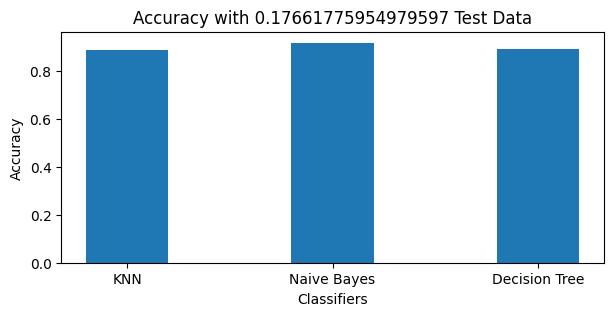

   KNN Accuracy: 0.88
   Naive Bayes Accuracy: 0.91
   Decision Tree Accuracy: 0.90


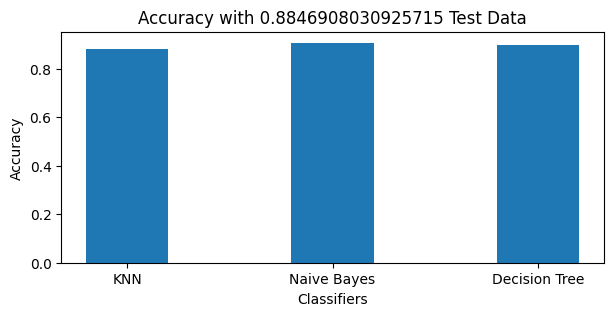



   KNN Accuracy: 0.89
   Naive Bayes Accuracy: 0.93
   Decision Tree Accuracy: 0.89


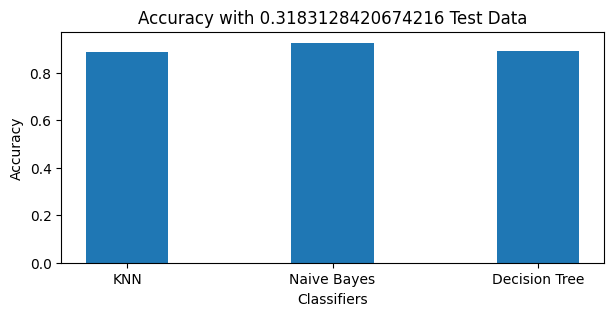

   KNN Accuracy: 0.85
   Naive Bayes Accuracy: 0.88
   Decision Tree Accuracy: 0.86


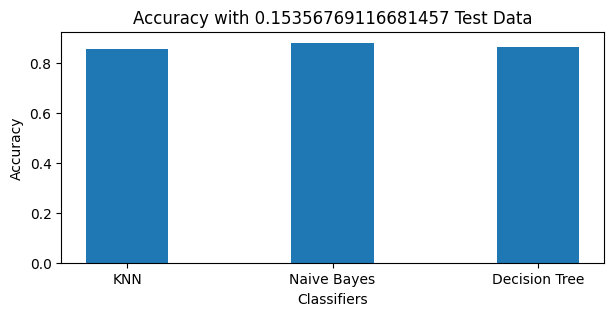



   KNN Accuracy: 0.83
   Naive Bayes Accuracy: 0.91
   Decision Tree Accuracy: 0.89


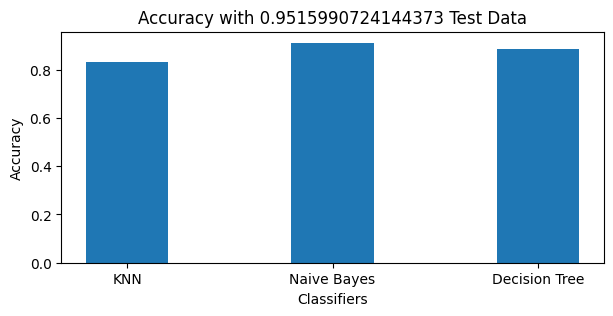

   KNN Accuracy: 0.87
   Naive Bayes Accuracy: 0.91
   Decision Tree Accuracy: 0.89


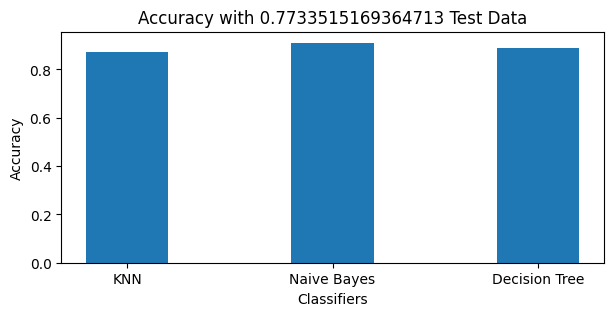

In [12]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Değişkenleri eğitim ve test verisi olarak ayırıyorum.

for i in range(3):
    test1= np.random.rand()+0.01
    test2= np.random.rand()+0.01
    X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X,y,test_size = test1)
    X_train_66, X_test_33, y_train_66, y_test_33 = train_test_split(X,y,test_size = test2)

    acc=[]
    for name, clf in classifiers.items():
        clf.fit(X_train_75, y_train_75)

        # Evaluate the classifier
        y_pred = clf.predict(X_test_25)
        accuracy = accuracy_score(y_test_25, y_pred)
        print('  ',f"{name} Accuracy: {accuracy:.2f}")
        acc.append(accuracy)
    fig = plt.figure(figsize = (7, 3))
     # creating the bar plot
    plt.bar(["KNN","Naive Bayes","Decision Tree"], acc, 
            width = 0.4)

    plt.xlabel("Classifiers")
    plt.ylabel("Accuracy")
    plt.title("Accuracy with "+str(test1)+" Test Data")
    plt.show()
    
    
    acc=[]
    for name, clf in classifiers.items():
        clf.fit(X_train_66, y_train_66)

        # Evaluate the classifier
        y_pred = clf.predict(X_test_33)
        accuracy = accuracy_score(y_test_33, y_pred)
        print('  ',f"{name} Accuracy: {accuracy:.2f}")
        acc.append(accuracy)
        
    fig = plt.figure(figsize = (7, 3))
     # creating the bar plot
    plt.bar(["KNN","Naive Bayes","Decision Tree"], acc, 
        width = 0.4)
 
    plt.xlabel("Classifiers")
    plt.ylabel("Accuracy")
    plt.title("Accuracy with "+str(test2)+ " Test Data")
    plt.show()
    
    print("=="*50,"\n\n")

## 5.1 - Cross Validation


Decision Tree CV

In [13]:
grid = {'criterion':['gini','entropy'] ,
        'min_samples_split':np.linspace(0,5,10)
       }

rf = DecisionTreeClassifier()
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(X_train_75,y_train_75)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(X_test_25,y_test_25))

p_pred = rf_cv.predict(X_test_25)
print(classification_report(y_test_25, p_pred))

Hyperparameters: {'criterion': 'gini', 'min_samples_split': 0.5555555555555556}
Train Score: 0.8966966966966968
Test Score: 0.92719249862107
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1562
           1       0.92      0.96      0.94      2064

    accuracy                           0.93      3626
   macro avg       0.93      0.92      0.93      3626
weighted avg       0.93      0.93      0.93      3626



KNN CV

In [14]:
grid = {'n_neighbors':[5,10,40,50,100]}
knn=KNeighborsClassifier()
rf_cv=GridSearchCV(knn,grid,cv=5)
rf_cv.fit(X_train_75,y_train_75)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(X_test_25,y_test_25))

p_pred = rf_cv.predict(X_test_25)
print("**"*50)
print("Accuracy -> " , accuracy_score(y_test_33, y_pred))
print("**"*50)

Hyperparameters: {'n_neighbors': 40}
Train Score: 0.8747747747747748
Test Score: 0.8800330943188086
****************************************************************************************************
Accuracy ->  0.8873430607397353
****************************************************************************************************


Naive Bayes CV

**NO hyperparamers , therefore no need for Cross Validation**

# 5.3 Scaled Data

In [15]:
scaler = StandardScaler()

X_train_75_scaled = scaler.fit_transform(X_train_75)
X_train_66_scaled = scaler.fit_transform(X_train_66)


X_test_25_scaled= scaler.fit_transform(X_test_25)
X_test_33_scaled= scaler.fit_transform(X_test_33)



   KNN Accuracy: 0.88
   Naive Bayes Accuracy: 0.92
   Decision Tree Accuracy: 0.86


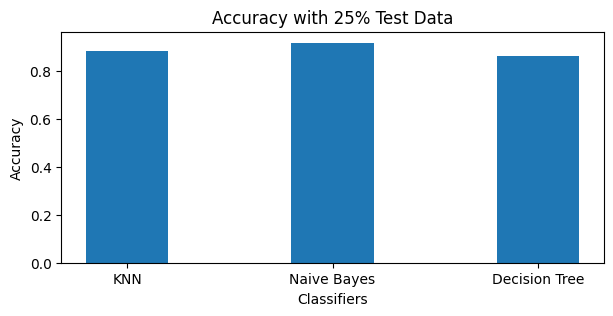

In [16]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

acc=[]
for name, clf in classifiers.items():
    clf.fit(X_train_75_scaled, y_train_75)

    # Evaluate the classifier
    y_pred = clf.predict(X_test_25_scaled)
    accuracy = accuracy_score(y_test_25, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")
    acc.append(accuracy)
fig = plt.figure(figsize = (7, 3))
 # creating the bar plot
plt.bar(["KNN","Naive Bayes","Decision Tree"], acc, 
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy with 25% Test Data")
plt.show()

   KNN Accuracy: 0.92
   Naive Bayes Accuracy: 0.92
   Decision Tree Accuracy: 0.89


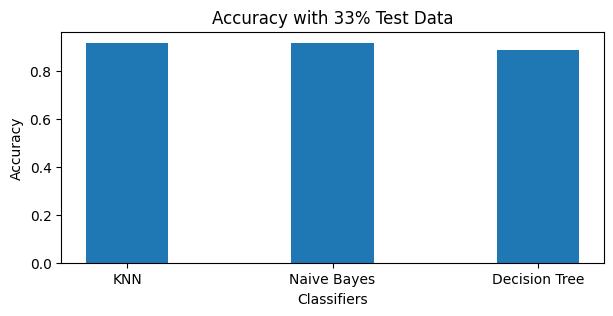

In [17]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

acc=[]
for name, clf in classifiers.items():
    clf.fit(X_train_66_scaled, y_train_66)

    # Evaluate the classifier
    y_pred = clf.predict(X_test_33_scaled)
    accuracy = accuracy_score(y_test_33, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")
    acc.append(accuracy)
fig = plt.figure(figsize = (7, 3))
 # creating the bar plot
plt.bar(["KNN","Naive Bayes","Decision Tree"], acc, 
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy with 33% Test Data")
plt.show()